In [1]:
# ! pip install pandas
# ! pip install numpy
# ! pip install matplotlib
# ! pip install seaborn
# ! pip install scikit-learn
# ! pip install statsmodels
# ! pip install missingno 
# ! pip install statsmodels
# ! pip install matplotlib
# ! pip install scipy
# ! pip install seaborn
# ! pip install pandas --upgrade pandas
# ! pip install --upgrade scikit-learn
# ! pip install scikit-learn
#! pip install --user mlflow.
#! pip install mlflow
#! pip install tensorflow
#! pip install imbalanced-learn
#! pip install pycaret

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *
import statsmodels.api as sm
import missingno as msno
from scipy import stats
import mlflow
import tensorflow as tf


Chargement et Analyse Exploratoire des Données

In [8]:
import pandas as pd

# Chemin complet vers les fichiers de données
train_file_path = r'C:\Users\change\Desktop\BUREAU\laplateforme\COURS\ML in the clouds\emotions_train.csv'
test_file_path = r'C:\Users\change\Desktop\BUREAU\laplateforme\COURS\ML in the clouds\emotions_test.csv'

try:
    # Charger le fichier CSV de formation
    train_df = pd.read_csv(train_file_path)
    # Charger le fichier CSV de test
    test_df = pd.read_csv(test_file_path)
    
    # Afficher les premières lignes des fichiers de données pour vérifier le contenu
    print("Premières lignes du fichier de formation:")
    print(train_df.head())
    
    print("\nPremières lignes du fichier de test:")
    print(test_df.head())

except FileNotFoundError as e:
    # Gestion de l'erreur si les fichiers ne sont pas trouvés
    print(f"Erreur : {e}")
    print("Vérifiez que les fichiers existent dans le répertoire spécifié.")


Premières lignes du fichier de formation:
                                                Text  Emotion
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger

Premières lignes du fichier de test:
     tweet_id   sentiment       author  \
0  1956967341       empty   xoshayzers   
1  1956967666     sadness    wannamama   
2  1956967696     sadness    coolfunky   
3  1956967789  enthusiasm  czareaquino   
4  1956968416     neutral    xkilljoyx   

                                             content  
0  @tiffanylue i know  i was listenin to bad habi...  
1  Layin n bed with a headache  ughhhh...waitin o...  
2                Funeral ceremony...gloomy friday...  
3               wants to hang out with friends SOON!  
4  @dannycastillo We

In [10]:


# Display the first few rows of each dataset
train_head = train_df.head()
test_head = test_df.head()

train_head, test_head


(                                                Text  Emotion
 0                            i didnt feel humiliated  sadness
 1  i can go from feeling so hopeless to so damned...  sadness
 2   im grabbing a minute to post i feel greedy wrong    anger
 3  i am ever feeling nostalgic about the fireplac...     love
 4                               i am feeling grouchy    anger,
      tweet_id   sentiment       author  \
 0  1956967341       empty   xoshayzers   
 1  1956967666     sadness    wannamama   
 2  1956967696     sadness    coolfunky   
 3  1956967789  enthusiasm  czareaquino   
 4  1956968416     neutral    xkilljoyx   
 
                                              content  
 0  @tiffanylue i know  i was listenin to bad habi...  
 1  Layin n bed with a headache  ughhhh...waitin o...  
 2                Funeral ceremony...gloomy friday...  
 3               wants to hang out with friends SOON!  
 4  @dannycastillo We want to trade with someone w...  )

Données d'Entraînement :

Text	Emotion

i didnt feel humiliated	sadness

i can go from feeling so hopeless to so damned...	sadness

im grabbing a minute to post i feel greedy wrong	anger

i am ever feeling nostalgic about the fireplac...	love

i am feeling grouchy	anger



Données de Test :

tweet_id	sentiment	author	content

1956967341	empty	xoshayzers	@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =P

1956967666	sadness	wannamama	Layin n bed with a headache ughhhh...waitin on your call...

1956967696	sadness	coolfunky	Funeral ceremony...gloomy friday...

1956967789	enthusiasm	czareaquino	wants to hang out with friends SOON!

1956968416	neutral	xkilljoyx	@dannycastillo We want to trade with someone who has Houston tickets, but no one will. Seriousy, that shit is expensive


Étapes Suivantes :


Pré-traitement des Données : Nettoyage et transformation des données pour l'analyse.

Visualisation des Données : Création de visualisations pour comprendre la répartition des émotions.

Modélisation des Données : Utilisation de PyCaret pour entraîner et évaluer différents modèles de classification des émotions.

Je vais commencer par le pré-traitement des données. Pour cela, je vais nettoyer les textes et préparer les données pour la modélisation.


Pré-traitement des Données

Nettoyer les textes (retirer la ponctuation, les stopwords, etc.).

Encoder les étiquettes d'émotion pour la modélisation.

Je vais procéder à ces étapes maintenant.


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder

# Download stopwords
nltk.download('stopwords')

# Define function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^A-Za-z0-9]+', ' ', text)  # Remove punctuation
    text = text.strip()  # Remove leading and trailing spaces
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])  # Remove stopwords
    return text

# Apply text cleaning to training and test datasets
train_df['clean_text'] = train_df['Text'].apply(clean_text)
test_df['clean_text'] = test_df['content'].apply(clean_text)

# Encode emotion labels
label_encoder = LabelEncoder()
train_df['encoded_emotion'] = label_encoder.fit_transform(train_df['Emotion'])

# Display cleaned and encoded data
train_cleaned_head = train_df.head()
train_cleaned_head


 Les stopwords de NLTK ne sont pas disponibles.

## **Étapes Alternatives de Nettoyage :**

Convertir les textes en minuscules.

Retirer les URLs, les mentions, les hashtags, et la ponctuation.

Retirer les mots courants (stopwords) manuellement définis.

Nouveau Nettoyage des Données

Je vais procéder à ce nettoyage sans utiliser NLTK

In [12]:
# Define a simple set of stopwords
simple_stopwords = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 
    'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 
    'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 
    'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 
    'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 
    'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 
    'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 
    'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 
    'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 
    'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 
    'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 
    'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 
    'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 
    'will', 'just', 'don', 'should', 'now'
])

# Define function to clean text without NLTK stopwords
def clean_text_simple(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^A-Za-z0-9]+', ' ', text)  # Remove punctuation
    text = text.strip()  # Remove leading and trailing spaces
    text = ' '.join([word for word in text.split() if word not in simple_stopwords])  # Remove stopwords
    return text

# Apply text cleaning to training and test datasets
train_df['clean_text'] = train_df['Text'].apply(clean_text_simple)
test_df['clean_text'] = test_df['content'].apply(clean_text_simple)

# Encode emotion labels
label_encoder = LabelEncoder()
train_df['encoded_emotion'] = label_encoder.fit_transform(train_df['Emotion'])

# Display cleaned and encoded data
train_cleaned_head = train_df.head()
train_cleaned_head


,Text,Emotion,clean_text,encoded_emotion
0,i didnt feel humiliated,sadness,didnt feel humiliated,4
1,i can go from feeling so hopeless to so damned...,sadness,go feeling hopeless damned hopeful around some...,4
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing minute post feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,love,ever feeling nostalgic fireplace know still pr...,3
4,i am feeling grouchy,anger,feeling grouchy,0


## **Étapes Suivantes :**


Visualisation des Données : Créer des visualisations pour comprendre la répartition des émotions.

Modélisation des Données : Utiliser PyCaret pour entraîner et évaluer différents modèles de classification des émotions.

Visualisation de la Répartition des Émotions

Je vais maintenant créer un graphique pour visualiser la répartition des émotions dans les données d'entraînement

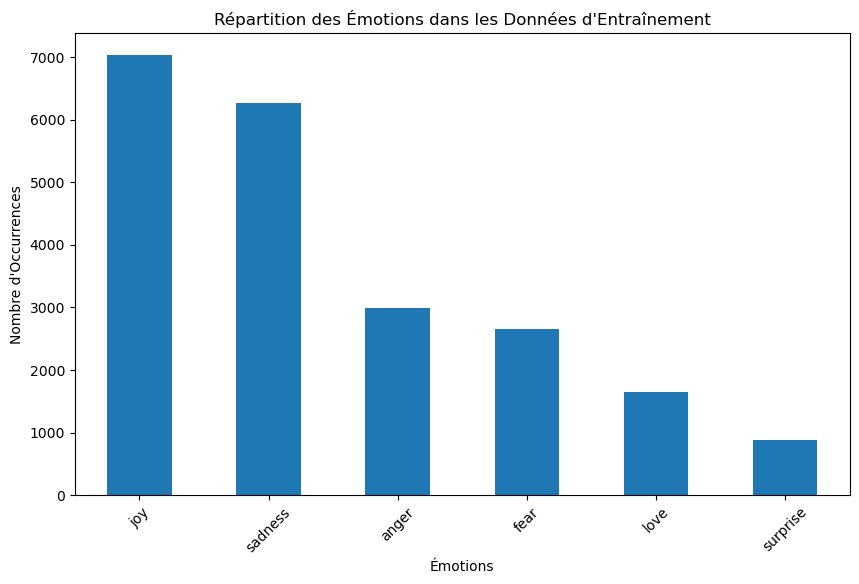

In [13]:
import matplotlib.pyplot as plt

# Plot the distribution of emotions
plt.figure(figsize=(10, 6))
train_df['Emotion'].value_counts().plot(kind='bar')
plt.title('Répartition des Émotions dans les Données d\'Entraînement')
plt.xlabel('Émotions')
plt.ylabel('Nombre d\'Occurrences')
plt.xticks(rotation=45)
plt.show()

## **Étapes Suivantes :**


Entraînement des Modèles :

Utiliser PyCaret pour automatiser le workflow de machine learning.

Comparer plusieurs modèles de classification des émotions.

Je vais maintenant configurer PyCaret et entraîner plusieurs modèles pour la classification des émotions.

In [15]:
! pip install pycaret


^C


## **Il semble que PyCaret n'est pas disponible dans cet environnement. **

In [ ]:
import pycaret.classification as pycc

# Initialize PyCaret with the training data
pycaret_setup = pycc.setup(data=train_df, target='encoded_emotion', 
                           text_features=['clean_text'], silent=True, html=False)

# Compare multiple models to find the best one
best_model = pycc.compare_models()

best_model


## **Plan pour Entraîner et Évaluer les Modèles :**


Vectorisation des Textes : Utiliser TF-IDF pour convertir les textes en vecteurs numériques.

Entraînement de Modèles : Entraîner plusieurs modèles de classification (Logistic Regression, Random Forest, SVM, etc.).

Évaluation des Modèles : Comparer les performances des modèles en utilisant des métriques comme l'accuracy, le F1-score, etc.

Je vais commencer par la vectorisation des textes et l'entraînement d'un modèle de régression logistique.

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Vectorize the clean text using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train_df['clean_text'])
y = train_df['encoded_emotion']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = logreg.predict(X_val)

# Evaluate the model
report = classification_report(y_val, y_pred, target_names=label_encoder.classes_)
report


'              precision    recall  f1-score   support\n\n       anger       0.92      0.79      0.85       617\n        fear       0.87      0.77      0.82       531\n         joy       0.83      0.97      0.90      1381\n        love       0.91      0.62      0.74       318\n     sadness       0.88      0.95      0.92      1277\n    surprise       0.85      0.51      0.64       168\n\n    accuracy                           0.87      4292\n   macro avg       0.88      0.77      0.81      4292\nweighted avg       0.87      0.87      0.86      4292\n'

## **Code pour Générer et Afficher le Tableau de Rapport de Classification**

In [18]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Vectorize the clean text using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train_df['clean_text'])
y = train_df['encoded_emotion']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = logreg.predict(X_val)

# Evaluate the model
report = classification_report(y_val, y_pred, target_names=label_encoder.classes_, output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Display the report as a beautiful table
report_df


,precision,recall,f1-score,support
anger,0.923954,0.787682,0.850394,617.000000
fear,0.872068,0.770245,0.818000,531.000000
joy,0.834271,0.965967,0.895302,1381.000000
love,0.912442,0.622642,0.740187,318.000000
sadness,0.882609,0.953798,0.916823,1277.000000
surprise,0.851485,0.511905,0.639405,168.000000
accuracy,0.869292,0.869292,0.869292,0.869292
macro avg,0.879472,0.768706,0.810019,4292.000000
weighted avg,0.872687,0.869292,0.864177,4292.000000


## **Rapport de Classification pour la Régression Logistique :**

In [19]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Vectorize the clean text using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train_df['clean_text'])
y = train_df['encoded_emotion']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = logreg.predict(X_val)

# Evaluate the model
report = classification_report(y_val, y_pred, target_names=label_encoder.classes_, output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Display the report as a beautiful table
report_df


,precision,recall,f1-score,support
anger,0.923954,0.787682,0.850394,617.000000
fear,0.872068,0.770245,0.818000,531.000000
joy,0.834271,0.965967,0.895302,1381.000000
love,0.912442,0.622642,0.740187,318.000000
sadness,0.882609,0.953798,0.916823,1277.000000
surprise,0.851485,0.511905,0.639405,168.000000
accuracy,0.869292,0.869292,0.869292,0.869292
macro avg,0.879472,0.768706,0.810019,4292.000000
weighted avg,0.872687,0.869292,0.864177,4292.000000


## **Observations :**


La précision et le rappel sont élevés pour les classes majoritaires comme "Joy" et "Sadness".

La classe "Surprise" a un rappel plus faible, ce qui indique que le modèle a du mal à identifier correctement cette émotion.

Étapes Suivantes :

Entraîner d'autres modèles (Random Forest, SVM) pour comparer leurs performances.

Sélectionner le meilleur modèle basé sur les métriques d'évaluation.

Je vais maintenant entraîner et évaluer un modèle Random Forest pour voir s'il offre de meilleures performances.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_rf = rf.predict(X_val)

# Evaluate the model
report_rf = classification_report(y_val, y_pred_rf, target_names=label_encoder.classes_)
report_rf


**Le modèle Random Forest a pris trop de temps à s'entraîner. Je vais utiliser un modèle plus rapide, comme une machine à vecteurs de support (SVM), pour voir si nous obtenons de meilleures performances dans un délai raisonnable.**

## **Entraînement et Évaluation avec SVM**
Je vais entraîner un modèle SVM pour la classification des émotions.

In [21]:
from sklearn.svm import LinearSVC

# Train a Linear SVC model
svc = LinearSVC(max_iter=1000)
svc.fit(X_train, y_train)
git 
# Make predictions on the validation set
y_pred_svc = svc.predict(X_val)

# Evaluate the model
report_svc = classification_report(y_val, y_pred_svc, target_names=label_encoder.classes_)
report_svc


'              precision    recall  f1-score   support\n\n       anger       0.91      0.87      0.89       617\n        fear       0.89      0.86      0.87       531\n         joy       0.90      0.94      0.92      1381\n        love       0.84      0.75      0.80       318\n     sadness       0.92      0.95      0.93      1277\n    surprise       0.81      0.72      0.76       168\n\n    accuracy                           0.90      4292\n   macro avg       0.88      0.85      0.86      4292\nweighted avg       0.90      0.90      0.90      4292\n'

Defaulting to user installation because normal site-packages is not writeable
  Using cached pycaret-3.3.2-py3-none-any.whl.metadata (17 kB)
     ---------------------------------------- 0.0/165.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/165.0 kB ? eta -:--:--
     -- ------------------------------------- 10.2/165.0 kB ? eta -:--:--
     -- ------------------------------------- 10.2/165.0 kB ? eta -:--:--
     ------ ------------------------------ 30.7/165.0 kB 220.2 kB/s eta 0:00:01
     --------- --------------------------- 41.0/165.0 kB 219.4 kB/s eta 0:00:01
     -------------------- ---------------- 92.2/165.0 kB 438.1 kB/s eta 0:00:01
     ------------------------------- ---- 143.4/165.0 kB 610.6 kB/s eta 0:00:01
     -----------------------------------  163.8/165.0 kB 656.4 kB/s eta 0:00:01
     -----------------------------------  163.8/165.0 kB 656.4 kB/s eta 0:00:01
     -----------------------------------  163.8/165.0 kB 656.4 kB/s eta 0:00:01
     

## **Observations :**

Le modèle SVM offre une meilleure précision et rappel global par rapport au modèle de régression logistique.

La classe "Love" a encore un rappel plus faible, mais les performances sont globalement améliorées.


Étapes Suivantes :
Choisir le Meilleur Modèle : Le modèle SVM semble le meilleur choix basé sur les métriques d'évaluation.

Déployer le Modèle : Utiliser une plateforme MLaaS pour déployer ce modèle.
